In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DatosSeguros.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1349 non-null   int64  
 1   sexo          1349 non-null   object 
 2   imc           1347 non-null   float64
 3   hijos         1349 non-null   int64  
 4   fumador       1347 non-null   object 
 5   region        1349 non-null   object 
 6   valor_seguro  1349 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.9+ KB


In [4]:
df.isnull().sum()

edad            0
sexo            0
imc             2
hijos           0
fumador         2
region          0
valor_seguro    0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1345 non-null   int64  
 1   sexo          1345 non-null   object 
 2   imc           1345 non-null   float64
 3   hijos         1345 non-null   int64  
 4   fumador       1345 non-null   object 
 5   region        1345 non-null   object 
 6   valor_seguro  1345 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 84.1+ KB


In [7]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1333 non-null   int64  
 1   sexo          1333 non-null   object 
 2   imc           1333 non-null   float64
 3   hijos         1333 non-null   int64  
 4   fumador       1333 non-null   object 
 5   region        1333 non-null   object 
 6   valor_seguro  1333 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.3+ KB


In [8]:
edad = df.sort_values('edad')       
edad.head(10)

,edad,sexo,imc,hijos,fumador,region,valor_seguro
1097,18,F,31.350,4,no,Boyaca,4561.18850
59,18,M,31.680,2,yes,Cundinamarca,34303.16720
1251,18,M,33.330,0,no,Cundinamarca,1135.94070
297,18,M,22.990,0,no,Boyaca,1704.56810
1255,18,F,39.820,0,no,Cundinamarca,1633.96180
944,18,F,40.185,0,no,Boyaca,2217.46915
1152,18,F,30.305,0,no,Boyaca,2203.73595
665,18,M,33.660,0,no,Cundinamarca,1136.39940
52,18,F,35.625,0,no,Boyaca,2211.13075
650,18,M,28.500,0,no,Boyaca,1712.22700


In [9]:
edad = df.sort_values('edad', ascending=False)
edad.head(10)

,edad,sexo,imc,hijos,fumador,region,valor_seguro
422,64,M,33.880,0,yes,Cundinamarca,46889.26120
754,64,M,37.905,0,no,Antioquia,14210.53595
404,64,F,32.965,0,no,Antioquia,14692.66935
420,64,M,39.160,1,no,Cundinamarca,14418.28040
380,64,F,30.115,3,no,Antioquia,16455.70785
1053,64,M,26.410,0,no,Boyaca,14394.55790
827,64,F,31.825,2,no,Boyaca,16069.08475
1248,64,M,36.960,2,yes,Cundinamarca,49577.66240
803,64,F,35.970,0,no,Cundinamarca,14313.84630
337,64,M,34.500,0,no,Caribe,13822.80300


In [10]:
rangos= [17, 28, 38, 48, 58, 68]
nombreRango= ["A", "B", "C", "D", "E"]

In [19]:
df['Rango_Edad'] = pd.cut(df['edad'], rangos, labels = nombreRango)

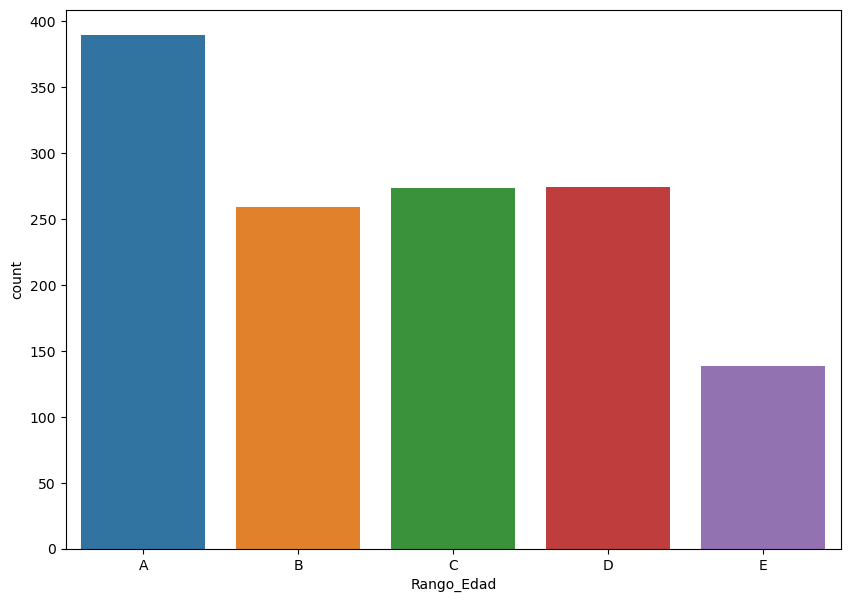

In [23]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='Rango_Edad')
plt.show()

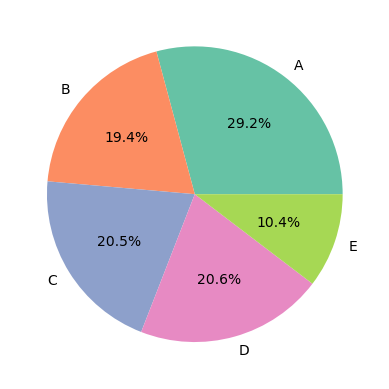

In [24]:
total_rango_edad = df['Rango_Edad'].groupby(df['Rango_Edad']).count()
labels = ["A", "B", "C", "D", "E"]
colors = sns.color_palette('Set2')[0:5]
plt.pie(total_rango_edad, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

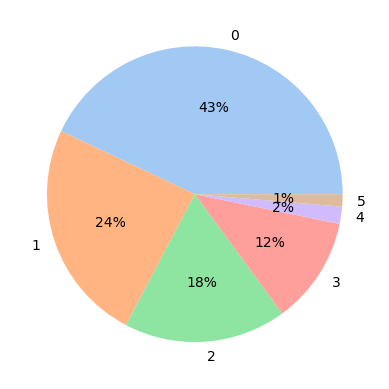

In [25]:
total_hijos = df['hijos'].groupby(df['hijos']).count()
etiquetas = [0,1,2,3,4,5]
colors = sns.color_palette('pastel')[0:6]
plt.pie(total_hijos, labels = etiquetas, colors = colors, autopct='%.0f%%')
plt.show()

In [26]:
df.describe()

,edad,imc,hijos,valor_seguro
count,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.195049,30.652097,1.092273,13261.908454
std,14.052008,6.097609,1.205484,12093.507648
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.675000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010
